## Importing Essential Libraries, Filtering Warnings and reading the Data File

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'E:\Learning Data Science With Python\Data Science 104 - Machine Learning Models\Data Science 104 - Linear Regression\Consumer Insights.csv')

In [3]:
df.head()

,Income\n($1000s),Household\nSize,Amount\nCharged ($)
0,54,3,"4,016"
1,30,2,"3,159"
2,32,4,"5,100"
3,50,5,"4,742"
4,31,2,"1,864"


## Renaming Columns for ease of use, checking Data Types, and doing basic data cleaning.

In [4]:
df.rename(columns={'Income\n($1000s)' : 'Income', 'Household\nSize':'Household Size', 'Amount\nCharged ($)' : 'Amount Charged'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Income          50 non-null     int64 
 1   Household Size  50 non-null     int64 
 2   Amount Charged  50 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [6]:
df['Amount Charged'] = df['Amount Charged'].apply(lambda x: float(x.replace(',','')))

In [7]:
df.head()

,Income,Household Size,Amount Charged
0,54,3,4016.0
1,30,2,3159.0
2,32,4,5100.0
3,50,5,4742.0
4,31,2,1864.0


## Linear Regression

* Linear regression is a technique used to identify and predict values based the relationship between a dependent variable (y) and one or more independent variables(x, {x1,x2,x3..})
* It uses the Ordinary Least Squares Method to minimize the square of error terms when we try to fit the best line. 
* The regression equation is Y=mX+c or Y = β0 + β1x1 + β2x2 +..., where β0 is the Intercept and {β1, β2, etc.,} are coefficients.
* The regression equation helps us to predict values with ease. It is used in a plethora of real-life scenarios.

### Checking the correlation between the variables.

* If there is high multi-colinearity, there is no point in running a multiple linear regression with all variables as the result will be likely inaccurate. Thus, we can check for it beforehand.

                  Income  Household Size  Amount Charged
Income          1.000000        0.172533        0.630974
Household Size  0.172533        1.000000        0.752843
Amount Charged  0.630974        0.752843        1.000000


<Axes: >

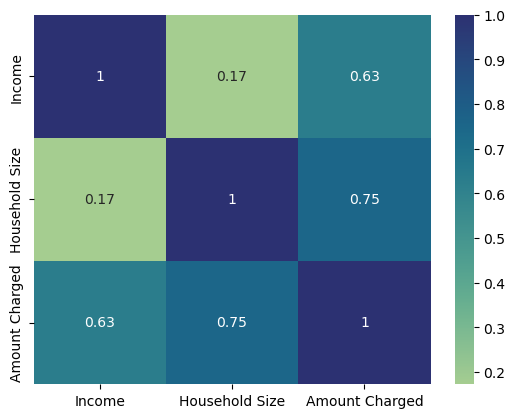

In [18]:
corr = df.corr()
print(corr)
sns.heatmap(corr, annot=True, cbar=True, cmap='crest')

### Fitting the Linear Regression Model

* In this example, the x variables are Income, and Household Size. (Independent)
* The y variable is Amount Charged. (Dependent)

In [34]:
reg = linear_model.LinearRegression()
reg.fit(df[['Income', 'Household Size']], df['Amount Charged'])

LinearRegression()

### Checking the Coefficients

In [35]:
reg.coef_

array([ 33.13300915, 356.29590149])

### Checking the Intercept

In [36]:
reg.intercept_

1304.9047791156122

### Prediction the values for a new set of inputs.

* If we want to predict the value for a family with an Income of 93 USD (in 1000s) and 6 people in the Household, we can predict it using the model we generated.

In [37]:
reg.predict([[93, 6]])

array([6524.05003889])